In [1]:
%env CUDA_VISIBLE_DIVICES=0

env: CUDA_VISIBLE_DIVICES=0


In [2]:
import transformers
import torch

In [4]:
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
#     device_map="auto",
    device="cuda:0",
)

messages = [
    {"role": "device=tem", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    messages,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
print(outputs[0]["generated_text"][-1])

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


{'role': 'assistant', 'content': "Arrr, me hearty! Me name be Captain Chat, the scurviest pirate chatbot to ever sail the Seven Seas o' the Interwebs! I be here to swab the decks o' yer queries, matey, and answer yer questions with me trusty parrot, Polly, perched on me shoulder. So hoist the colors, me hearty, and let's set sail fer a swashbucklin' good time!"}


In [ ]:
INSTRUCTIONS = """Relevant facts:

1. observations of abnormalities
2. observations of diseases
3. observations of strange visual patterns
4. observations of devices
5. observations of foreign bodies
6. observations of specific anatomical regions that look normal or healthy
7. absences of abnormalities (usually expressed with a negation)
8. comparisons with respect to a previous study (something changed or remained the same)
9. suggestions or recommendations based on the observations

Task:

Given a sentence from a chest x-ray report, output a JSON array of facts.
Each fact should be about one observation. If a sentence mentions multiple observations,
each observation should be extracted as a separate fact.
Each fact should include the anatomical location where it was observed. If multiple facts occur in the same location, repeat the location in each fact.

If no relevant facts are mentioned, return [] (an empty array).

Examples:

Opacity and density in the right lobe
[
"opacity in the right lobe",
"density in the right lobe"
]

Lungs are well inflated without evidence of focal airspace consolidation to suggest pneumonia.
[
"well inflated lungs",
"lungs without evidence of focal airspace consolidation",
"lungs without evidence of pneumonia"
]

Taken together, compared with less than 1 hr earlier, the findings are suggestive of worsening of CHF, with new or significantly increased left greater right pleural effusions and underlying bibasilar collapse and/or  consolidation, particularly on the left.
[
"worsening of CHF",
"new or significantly increased left pleural effusions",
"new or significantly increased right pleural effusions",
"underlying bibasilar collapse on the left",
"underlying consolidation on the left",
]

No acute cardiopulmonary abnormality
[
"no acute cardiopulmonary abnormality"
]

If clinical presentation is not convincing for pneumonia, pulmonary embolism should be considered
[
"clinical presentation may indicate pneumonia",
"clinical presentation may indicate pulmonary embolism",
]"""
    
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
#     device_map="auto",
    device="cuda:0",
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

In [45]:
messages = [
    {"role": "system", "content": INSTRUCTIONS},
    {"role": "user", "content": "Progression of left pleural and nodal metastases."},
]

outputs = pipeline(
    messages,
    max_new_tokens=300,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
print(outputs[0]["generated_text"][-1])

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


{'role': 'assistant', 'content': '[\n"progression of left pleural metastases",\n"progression of left nodal metastases"\n]'}


In [7]:
outputs = pipeline(
    messages,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0.6,
    top_p=0.9,
)
print(outputs[0]["generated_text"][-1])

/home/pamessina/venv2/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/pamessina/venv2/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


{'role': 'assistant', 'content': 'Reason: The premise implies a worsening of the condition.\nLabel: entailment'}


In [9]:
messages = [
    {"role": "system", "content": INSTRUCTIONS},
    {"role": "user", "content": "#P: increased pulmonary edema. | #H: no pulmonary edema"},
]
outputs = pipeline(
    messages,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0.6,
    top_p=0.9,
)
print(outputs[0]["generated_text"][-1])

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


{'role': 'assistant', 'content': 'Reason: The premise states that there is increased pulmonary edema, which is the opposite of the hypothesis that there is no pulmonary edema.\nLabel: contradiction'}


In [10]:
outputs

[{'generated_text': [{'role': 'system',
    'content': 'Context: natural language inference.\n\nGiven a premise (#P) and a hypothesis (#H), output "Reason: {reason}. Label: {label}" where {reason} is a short sentence and {label} is one of "entailment," "contradiction," or "neutral."\n\nUse "entailment" when the premise necessarily entails the truth of the hypothesis.\n\nUse "contradiction" when premise and hypothesis are mutually exclusive/contradictory. Pay attention to logical inconsistencies, such as expressions suggesting presence vs. absence, etc.\n\nUse "neutral" when there\'s no contradiction, but the premise doesn\'t necessarily entail the hypothesis.\n\nExamples:\n\n1. #P: increased pulmonary edema. | #H: worsened pulmonary edema.\nLabel: entailment-\n\n2. #P: No pulmonary edema, consolidation, or pneumothorax. | #H: No focal consolidation, pleural effusion, or pneumothorax is present.\nLabel: neutral'},
   {'role': 'user',
    'content': '#P: increased pulmonary edema. | #H: 

In [3]:
from medvqa.datasets.nli import RADNLI_TEST_JSONL_PATH
from medvqa.utils.files import load_jsonl

test_rows = load_jsonl(RADNLI_TEST_JSONL_PATH)
nli_queries = [f'#P: {row["sentence1"]} | #H: {row["sentence2"]}' for row in test_rows]

In [4]:
nli_queries[0]

'#P: No free air below the right hemidiaphragm is seen. | #H: There is again mild relative elevation of the right hemidiaphragm.'

In [5]:
from medvqa.models.huggingface_utils import generate_text_with_llama3

In [6]:
INSTRUCTIONS = """Context: natural language inference.

Given a premise (#P) and a hypothesis (#H), output "Reason: {reason}. Label: {label}" where {reason} is a short sentence and {label} is one of "entailment," "contradiction," or "neutral."

Use "entailment" when the premise necessarily entails the truth of the hypothesis.

Use "contradiction" when premise and hypothesis are mutually exclusive/contradictory. Pay attention to logical inconsistencies, such as expressions suggesting presence vs. absence, etc.

Use "neutral" when there's no contradiction, but the premise doesn't necessarily entail the hypothesis.

Examples:

1. #P: increased pulmonary edema. | #H: worsened pulmonary edema.
Label: entailment

2. #P: No pulmonary edema, consolidation, or pneumothorax. | #H: No focal consolidation, pleural effusion, or pneumothorax is present.
Label: neutral"""

outputs = generate_text_with_llama3(
    system_instructions=INSTRUCTIONS,
    user_input_texts=nli_queries,
    do_sample=False,
    temperature=None,
    top_p=None,
    device="cuda:0",
    device_map=None,
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  0%|                                                                                           | 0/480 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
  0%|▎                                                                                  | 2/480 [00:03<12:05,  1.52s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
  1%|▋                                                                                  | 4/480 [00:05<09:57,  1.26s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
  1%|█                                                                              

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 13%|██████████▊                                                                       | 63/480 [01:17<09:21,  1.35s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 14%|███████████                                                                       | 65/480 [01:21<10:20,  1.50s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 14%|███████████▍                                                                      | 67/480 [01:23<09:36,  1.39s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 14%|███████████▊                                                                      | 69/480 [01:26<09:34,  1.40s/it]Setting `

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 40%|████████████████████████████████▋                                                | 194/480 [03:49<06:01,  1.26s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 41%|█████████████████████████████████                                                | 196/480 [03:52<06:11,  1.31s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 41%|█████████████████████████████████▍                                               | 198/480 [03:54<05:45,  1.22s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 42%|█████████████████████████████████▉                 

 67%|██████████████████████████████████████████████████████▏                          | 321/480 [06:20<03:14,  1.23s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 68%|██████████████████████████████████████████████████████▋                          | 324/480 [06:23<02:55,  1.13s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 68%|███████████████████████████████████████████████████████▏                         | 327/480 [06:26<02:48,  1.10s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 94%|████████████████████████████████████████████████████████████████████████████     | 451/480 [08:55<00:32,  1.13s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 95%|████████████████████████████████████████████████████████████████████████████▌    | 454/480 [08:58<00:28,  1.09s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 95%|████████████████████████████████████████████████████████████████████████████▉    | 456/480 [09:02<00:28,  1.21s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open

In [38]:
from medvqa.utils.files import save_pickle

In [10]:
outputs[-3]

'Reason: The premise and hypothesis are identical, except for the phrase "is detected".\nLabel: entailment'

In [11]:
outputs[-5]

'Reason: The absence of an acute osseous abnormality implies the absence of a focal infiltrate.\nLabel: entailment'

In [12]:
test_rows[0]

{'pair_id': '0',
 'sentence1': 'No free air below the right hemidiaphragm is seen.',
 'sentence2': 'There is again mild relative elevation of the right hemidiaphragm.',
 'gold_label': 'neutral'}

In [13]:
from medvqa.eval_NLI_v4 import _compute_confusion_matrix

Given a list of radiological factual statements (#F) and a hypothesis (#H), output "Reason: {reason}. Label: {label}" where {reason} is a short explanatory sentence and {label} is one of {definitely true, likely true, unknown, likely false, definitely false}.


In [20]:
NLI_CLASSES = ['entailment', 'neutral', 'contradiction']

In [27]:
pred_labels = []
for j, x in enumerate(outputs):
    xx = x.split()[-1]
    found = False
    for i, y in enumerate(NLI_CLASSES):
        if xx == y:
            pred_labels.append(i)
            found = True
            break
    if not found:
        print(j, x, xx)
        pred_labels.append(None)

193 Reason: The two statements are unrelated and do not provide any logical connection between the absence of acute pulmonary parenchymal infiltrates and the absence of displaced rib fracture. fracture.


In [18]:
from collections import Counter

In [28]:
test_rows[193]

{'pair_id': '193',
 'sentence1': 'No acute pulmonary parenchymal infiltrates can be identified.',
 'sentence2': 'No displaced rib fracture is definitively identified.',
 'gold_label': 'neutral'}

In [31]:
pred_labels[193] = NLI_CLASSES.index('neutral')

In [19]:
Counter(pred_labels)

Counter({1: 154, 0: 248, 2: 77, None: 1})

In [22]:
gt_labels = [NLI_CLASSES.index(x['gold_label']) for x in test_rows]

In [32]:
import numpy as np
pred_labels = np.array(pred_labels)
gt_labels = np.array(gt_labels)

Accuracy: 0.6146


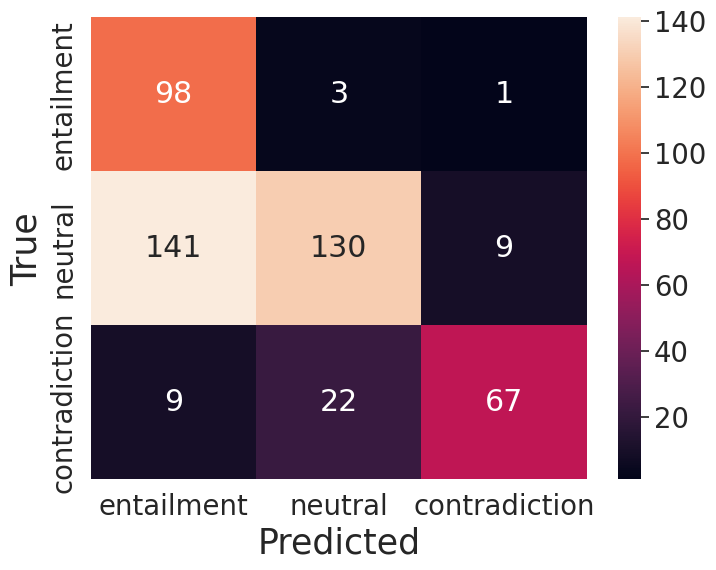

In [33]:
_compute_confusion_matrix(pred_labels, gt_labels)

In [6]:
INSTRUCTIONS_v2 = """Context: natural language inference.

Given a premise and a hypothesis, output "entailment", "contradiction", or "neutral".

Use "entailment" when the facts stated by the premise necessarily entail the truth of the hypothesis.

Use "contradiction" when premise and hypothesis are mutually exclusive/contradictory (both cannot be true at the same time).

Use "neutral", if there is no contradiction (premise and hypothesis are compatible), but the premise does not entail the hypothesis (it's possible for the premise to be true and the hypothesis still be false). In other words, use "neutral" when neither "entailment" nor "contradiction" adequately fit."""

outputs_v2 = generate_text_with_llama3(
    system_instructions=INSTRUCTIONS_v2,
    user_input_texts=nli_queries,
    do_sample=False,
    temperature=None,
    top_p=None,
    device="cuda:0",
    device_map=None,
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  0%|                                                                                           | 0/480 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
  1%|▋                                                                                  | 4/480 [00:02<05:14,  1.51it/s]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
  2%|█▍                                                   

 30%|████████████████████████▎                                                        | 144/480 [03:04<07:19,  1.31s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 30%|████████████████████████▋                                                        | 146/480 [03:10<09:03,  1.63s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 31%|█████████████████████████▏                                                       | 149/480 [03:13<07:52,  1.43s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 32%|█████████████████████████▋                         

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 46%|█████████████████████████████████████▍                                           | 222/480 [04:34<04:08,  1.04it/s]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 47%|██████████████████████████████████████▎                                          | 227/480 [04:37<03:33,  1.18it/s]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos

 78%|███████████████████████████████████████████████████████████████▍                 | 376/480 [07:17<03:56,  2.27s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 79%|███████████████████████████████████████████████████████████████▊                 | 378/480 [07:20<03:30,  2.06s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 79%|████████████████████████████████████████████████████████████████▏                | 380/480 [07:25<03:37,  2.17s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 80%|███████████████████████████████████████████████████

 93%|███████████████████████████████████████████████████████████████████████████▌     | 448/480 [08:49<00:37,  1.16s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 94%|████████████████████████████████████████████████████████████████████████████     | 451/480 [08:58<00:48,  1.69s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
 95%|████████████████████████████████████████████████████████████████████████████▊    | 455/480 [09:03<00:37,  1.51s/it]Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open

In [7]:
from medvqa.eval_NLI_v4 import _compute_confusion_matrix

Given a list of radiological factual statements (#F) and a hypothesis (#H), output "Reason: {reason}. Label: {label}" where {reason} is a short explanatory sentence and {label} is one of {definitely true, likely true, unknown, likely false, definitely false}.


In [8]:
NLI_CLASSES = ['entailment', 'neutral', 'contradiction']

In [11]:
pred_labels = []
for j, x in enumerate(outputs_v2):
    xx = x.lower().split()[0]
    found = False
    for i, y in enumerate(NLI_CLASSES):
        if xx == y:
            pred_labels.append(i)
            found = True
            break
    if not found:
        print(j, x, xx)
        pred_labels.append(None)

379 I would classify this pair as "neutral".

The premise states that there are no focal parenchymal opacities, while the hypothesis describes the presence of widespread parenchymal opacities. These two statements are not mutually exclusive, and the presence of widespread opacities does not necessarily contradict the absence of focal opacities. Additionally, the premise does not entail the truth of the hypothesis, as it is possible for there to be no focal opacities but still have widespread opacities. Therefore, the relationship between the premise and hypothesis is neutral. i


In [13]:
pred_labels[379] = NLI_CLASSES.index('neutral')

In [14]:
from collections import Counter

In [15]:
Counter(pred_labels)

Counter({1: 179, 0: 251, 2: 50})

In [16]:
gt_labels = [NLI_CLASSES.index(x['gold_label']) for x in test_rows]

In [17]:
import numpy as np
pred_labels = np.array(pred_labels)
gt_labels = np.array(gt_labels)

Accuracy: 0.5813


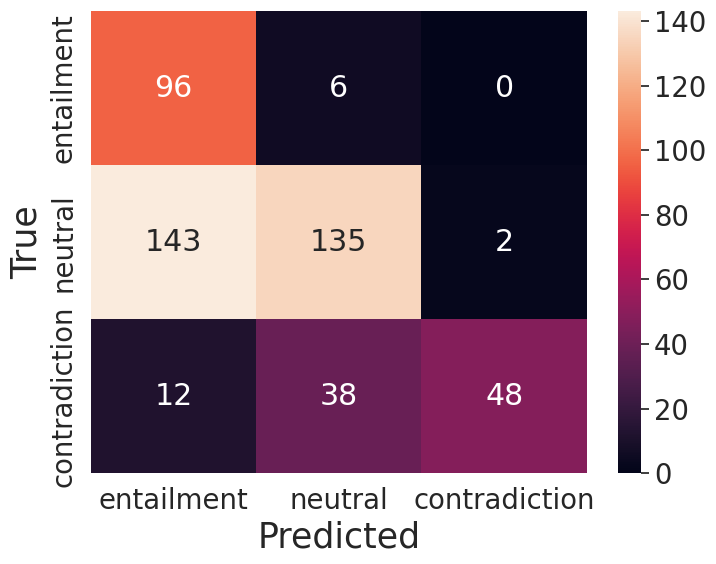

In [18]:
_compute_confusion_matrix(pred_labels, gt_labels)

In [3]:
from medvqa.utils.files import load_pickle, save_pickle, list_filepaths_with_prefix_and_timestamps

In [26]:
list_filepaths_with_prefix_and_timestamps('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression')

[('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json__detailed_metadata.pkl',
  '2023-08-29 10:04:02'),
 ('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json',
  '2023-06-12 17:41:46'),
 ('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230610_132343.json',
  '2023-06-10 13:23:46')]

In [4]:
from medvqa.datasets.mimiccxr import load_mimiccxr_reports_detailed_metadata

In [5]:
tmp = load_mimiccxr_reports_detailed_metadata(
    background_findings_and_impression_per_report_filepath='/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json')

In [6]:
tmp.keys()

dict_keys(['part_ids', 'subject_ids', 'study_ids', 'dicom_id_view_pos_pairs', 'splits', 'filepaths', 'backgrounds', 'findings', 'impressions'])

In [7]:
from nltk.tokenize import sent_tokenize

In [8]:
sentences = set()
for findings, impression, split in zip(tmp['findings'], tmp['impressions'], tmp['splits']):
    if split == 'test':
        if findings:
            sentences.update(sent_tokenize(findings))
        if impression:
            sentences.update(sent_tokenize(impression))                

In [9]:
len(sentences)

17376

In [10]:
sentences_list = list(sentences)

In [11]:
sentences_list.sort()

In [12]:
sentences_list[10000]

'Progression of left pleural and nodal metastases.'

In [13]:
from medvqa.models.huggingface_utils import generate_text_with_llama3

In [14]:
INSTRUCTIONS = """Relevant facts:

1. observations of abnormalities
2. observations of diseases
3. observations of strange visual patterns
4. observations of devices
5. observations of foreign bodies
6. observations of specific anatomical regions that look normal or healthy
7. absences of abnormalities (usually expressed with a negation)
8. comparisons with respect to a previous study (something changed or remained the same)
9. suggestions or recommendations based on the observations

Task:

Given a sentence from a chest x-ray report, output a JSON array of facts.
Each fact should be about one observation. If a sentence mentions multiple observations,
each observation should be extracted as a separate fact.
Each fact should include the anatomical location where it was observed. If multiple facts occur in the same location, repeat the location in each fact.

If no relevant facts are mentioned, return [] (an empty array).

Examples:

Opacity and density in the right lobe
[
"opacity in the right lobe",
"density in the right lobe"
]

Lungs are well inflated without evidence of focal airspace consolidation to suggest pneumonia.
[
"well inflated lungs",
"lungs without evidence of focal airspace consolidation",
"lungs without evidence of pneumonia"
]

Taken together, compared with less than 1 hr earlier, the findings are suggestive of worsening of CHF, with new or significantly increased left greater right pleural effusions and underlying bibasilar collapse and/or  consolidation, particularly on the left.
[
"worsening of CHF",
"new or significantly increased left pleural effusions",
"new or significantly increased right pleural effusions",
"underlying bibasilar collapse on the left",
"underlying consolidation on the left",
]

No acute cardiopulmonary abnormality
[
"no acute cardiopulmonary abnormality"
]

If clinical presentation is not convincing for pneumonia, pulmonary embolism should be considered
[
"clinical presentation may indicate pneumonia",
"clinical presentation may indicate pulmonary embolism",
]"""

extracted_facts = generate_text_with_llama3(
    system_instructions=INSTRUCTIONS,
    user_input_texts=sentences,
    max_len=300,
    do_sample=False,
    temperature=None,
    top_p=None,
    device="cuda:0",
    device_map=None,
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|███████████████████████████████████████████████████████████████████████████| 17376/17376 [6:26:41<00:00,  1.34s/it]


In [30]:
sentences_list_2 = list(sentences)

In [40]:
to_save = {
    'sentences': sentences_list_2,
    'extracted_facts': extracted_facts,
}
save_pickle(to_save, '/home/pamessina/tmp/llama3_mimiccxr_test_set_sentences2facts.pkl')

In [41]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


In [42]:
!ls -lh  "/home/pamessina/tmp/llama3_mimiccxr_test_set_sentences2facts.pkl"

-rw-rw-r-- 1 pamessina pamessina 3.5M May 31 21:34 /home/pamessina/tmp/llama3_mimiccxr_test_set_sentences2facts.pkl


In [43]:
tmp = load_pickle('/home/pamessina/tmp/llama3_mimiccxr_test_set_sentences2facts.pkl')

In [44]:
tmp.keys()

dict_keys(['sentences', 'extracted_facts'])

In [45]:
len(tmp['sentences'])

17376

In [46]:
len(tmp['extracted_facts'])

17376

In [54]:
i = -120
print(tmp['sentences'][i])
print(tmp['extracted_facts'][i])

An opacity at the base of the right lung is not similar in appearance to chest radiograph on and may represent overlapping structures.
Here is the output in JSON array format:

[
"opacity at the base of the right lung",
"opacity may represent overlapping structures"
]

Note that I extracted two separate facts from the sentence: one about the opacity and another about the potential cause of the opacity.


In [55]:
from medvqa.scripts.mimiccxr.extract_facts_from_report_sentences_with_openai import _JSON_STRING_ARRAY_REGEX

In [57]:
match = _JSON_STRING_ARRAY_REGEX.search("""Here is the output in JSON array format:

[
"opacity at the base of the right lung",
"opacity may represent overlapping structures"
]

Note that I extracted two separate facts from the sentence: one about the opacity and another about the potential cause of the opacity.""")

In [59]:
s2fs = {}
for s, fs in zip(tmp['sentences'], tmp['extracted_facts']):
    match = _JSON_STRING_ARRAY_REGEX.search(fs)
    if match:
        fs = eval(match.group(0))
    else:
        fs = []
    s2fs[s] = fs

In [62]:
i = -1
tmp['sentences'][i], s2fs[tmp['sentences'][i]]

('There is stable widening of the mediastinum.',
 ['stable widening of the mediastinum'])

In [63]:
save_pickle(s2fs, '/home/pamessina/tmp/llama3_mimiccxr_test_set_sentences2facts_dict.pkl')